<a href="https://colab.research.google.com/github/kristina-skoptsova/image_processing/blob/main/Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Модуль 4. Анализ и синтез изображений


## Иллюстрации детекторов объектов с использованием HOG и SVM
HOG представляет собой дескриптор, который извлекает информацию о градиентах изображения, что позволяет выделять формы и контуры объектов.
Метод опорных векторов используется для классификации извлеченных признаков. SVM находит гиперплоскость, которая максимально разделяет классы


Размерность HOG признаков: (1797, 32)
Accuracy: 0.8685185185185185
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        53
           1       0.98      0.84      0.90        50
           2       0.92      0.94      0.93        47
           3       0.78      0.78      0.78        54
           4       0.87      0.87      0.87        60
           5       0.87      0.88      0.87        66
           6       0.94      0.96      0.95        53
           7       0.90      0.96      0.93        55
           8       0.70      0.74      0.72        43
           9       0.85      0.78      0.81        59

    accuracy                           0.87       540
   macro avg       0.87      0.87      0.87       540
weighted avg       0.87      0.87      0.87       540



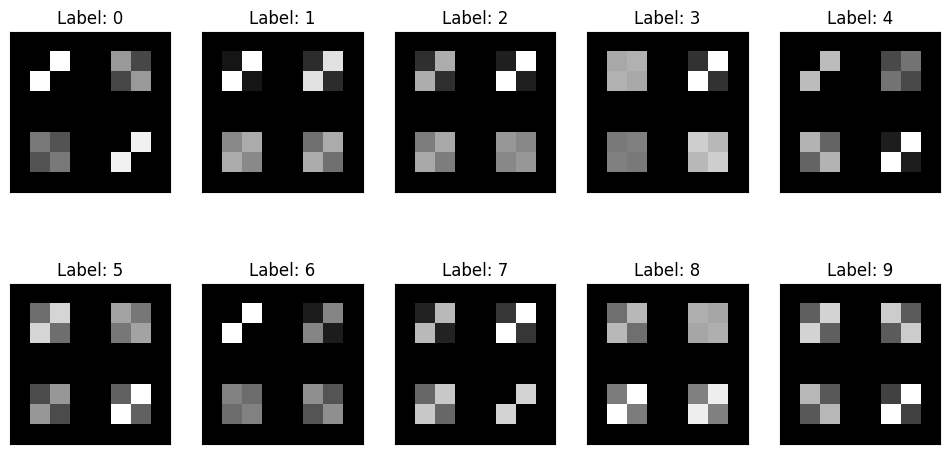

In [10]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.feature import hog
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Загрузка набора данных MNIST
digits = datasets.load_digits()


# Выбор признаков с помощью HOG
def extract_hog_features(images):
    hog_features = []
    for image in images:
        fd = hog(
            image,
            orientations=8, # количество направлений градиентов
            pixels_per_cell=(4, 4), # размер ячейки в пикселях
            cells_per_block=(2, 2), # количество ячеек в блоке
            block_norm="L2-Hys", # метод нормализации
            visualize=False,
        )
        hog_features.append(fd)
    return np.array(hog_features)


# Преобразование изображений в HOG признаки
hog_features = extract_hog_features(digits.images)

# Проверка размерности массива hog_features
print("Размерность HOG признаков:", hog_features.shape)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    hog_features, digits.target, test_size=0.3, random_state=42
)

# Создание и обучение модели SVM
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = svm.predict(X_test)

# Оценка качества модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Визуализация HOG признаков для нескольких изображений
fig, axes = plt.subplots(2, 5, figsize=(12, 6), subplot_kw={"xticks": [], "yticks": []})
for ax, image, label in zip(axes.ravel(), digits.images, digits.target):
    fd, hog_image = hog(
        image,
        orientations=8,
        pixels_per_cell=(4, 4),
        cells_per_block=(2, 2),
        block_norm="L2-Hys",
        visualize=True,
    )
    ax.imshow(exposure.rescale_intensity(hog_image, in_range=(0, 10)), cmap=plt.cm.gray)
    ax.set_title(f"Label: {label}")

plt.show()

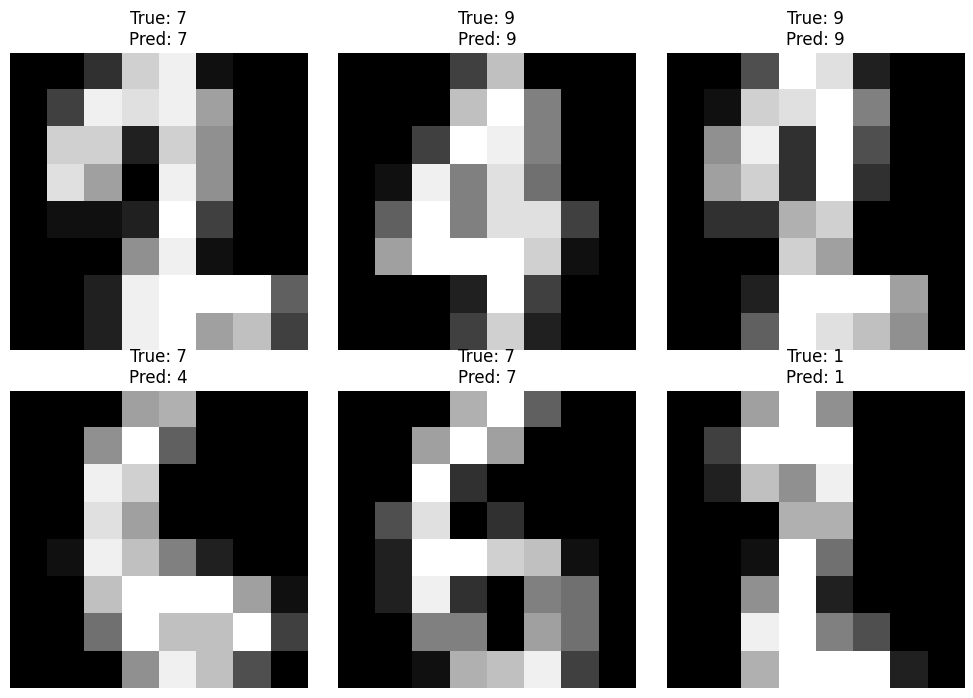

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Выбор 6 случайных изображений из тестовой выборки
random_indices = np.random.choice(len(X_test), 6, replace=False)
random_images = X_test[random_indices]
random_labels = y_test[random_indices]
predicted_labels = svm.predict(random_images)

# Отображение изображений с подписями распознанных классов
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
for ax, img, true_label, pred_label in zip(
    axes.ravel(), random_indices, random_labels, predicted_labels
):
    ax.imshow(digits.images[img], cmap=plt.cm.gray)
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")
    ax.axis("off")

plt.tight_layout()
plt.show()

Для демонстрации ограничений метода HOG+SVM можно использовать более сложный датасет, такой как CIFAR-10. CIFAR-10 содержит изображения различных объектов, что делает задачу распознавания более сложной. Мы будем использовать этот датасет, чтобы показать, как модель HOG+SVM справляется с более сложными изображениями, и затем визуализируем распознавание для 6 случайных изображений.

Вот как это сделать:

1. Загрузим и подготовим датасет CIFAR-10.
2. Извлечем HOG признаки.
3. Обучим модель SVM.
4. Сделаем предсказания и визуализируем их.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Размерность HOG признаков (обучающая выборка): (1000, 288)
Размерность HOG признаков (тестовая выборка): (1000, 288)
Accuracy: 0.415
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.42      0.45       100
           1       0.50      0.58      0.54       100
           2       0.38      0.34      0.36       100
           3       0.23      0.26      0.25       100
           4       0.34      0.36      0.35       100
           5       0.39      0.40      0.39       100
           6       0.41      0.49      0.45       100
           7       0.46      0.42      0.44       100
           8       0.43      0.40      0.41       100
           9       0.57      0.48      0.52       100

    accuracy                           0.41      1000
   macro avg       0.42      0.42      0.42      1000
weighted avg       0.42      0.41      0.42      1000



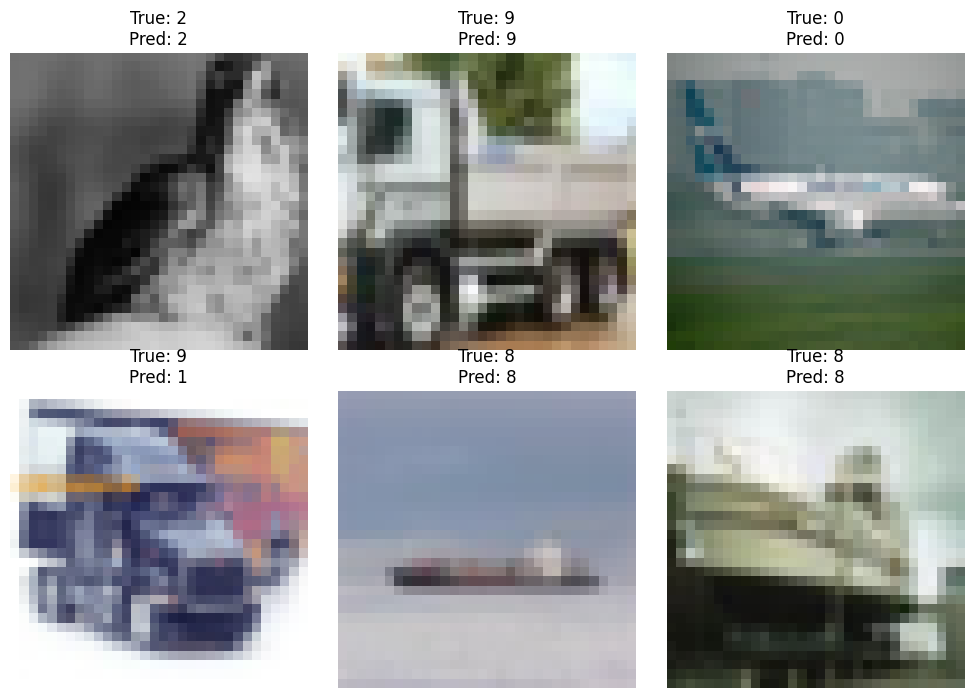

In [6]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import color, exposure
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from tensorflow.keras.datasets import cifar10

# Загрузка набора данных CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Преобразование меток из 2D в 1D
y_train = y_train.flatten()
y_test = y_test.flatten()

# Выбор подмножества данных для ускорения вычислений
subset_size = 1000
X_train_subset, _, y_train_subset, _ = train_test_split(
    X_train, y_train, train_size=subset_size, stratify=y_train, random_state=42
)
X_test_subset, _, y_test_subset, _ = train_test_split(
    X_test, y_test, train_size=subset_size, stratify=y_test, random_state=42
)


# Извлечение HOG признаков
def extract_hog_features(images):
    hog_features = []
    for image in images:
        gray_image = color.rgb2gray(image)
        fd = hog(
            gray_image,
            orientations=8,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            block_norm="L2-Hys",
            visualize=False,
        )
        hog_features.append(fd)
    return np.array(hog_features)


# Преобразование изображений в HOG признаки
X_train_hog = extract_hog_features(X_train_subset)
X_test_hog = extract_hog_features(X_test_subset)

# Проверка размерности массива hog_features
print("Размерность HOG признаков (обучающая выборка):", X_train_hog.shape)
print("Размерность HOG признаков (тестовая выборка):", X_test_hog.shape)

# Создание и обучение модели SVM
svm = SVC(kernel="linear")
svm.fit(X_train_hog, y_train_subset)

# Предсказание на тестовых данных
y_pred = svm.predict(X_test_hog)

# Оценка качества модели
print("Accuracy:", accuracy_score(y_test_subset, y_pred))
print("Classification Report:")
print(classification_report(y_test_subset, y_pred))

# Визуализация распознавания для 6 случайных изображений
random_indices = np.random.choice(len(X_test_subset), 6, replace=False)
random_images = X_test_subset[random_indices]
random_labels = y_test_subset[random_indices]
predicted_labels = svm.predict(X_test_hog[random_indices])

# Отображение изображений с подписями распознанных классов
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
for ax, img, true_label, pred_label in zip(
    axes.ravel(), random_images, random_labels, predicted_labels
):
    ax.imshow(img)
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")
    ax.axis("off")

plt.tight_layout()
plt.show()